In [1]:
# fixing autocomplete
%config Completer.use_jedi = False
# better quality plots in notebook
%config InlineBackend.figure_format='retina'

%matplotlib inline
# plot and crunch numbers
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np
import pandas as np
import sympy as sp


In [2]:
from qdef import *

Reloading...


## Many-Electron Wavefunctions

###
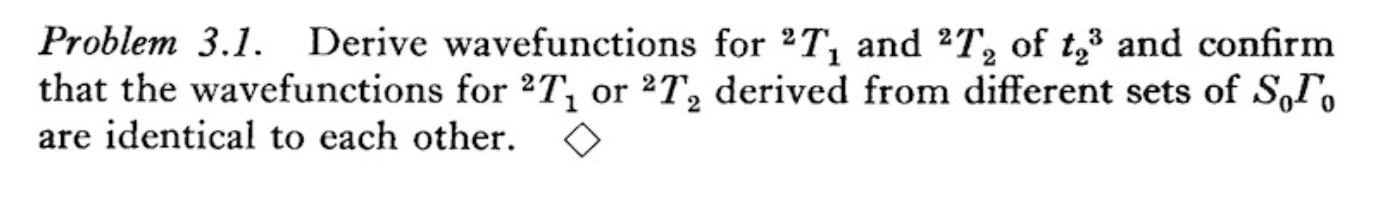

In [3]:
α, β, γ = sp.symbols("α β γ")
u, v = sp.symbols("u v")
ξ, η, ζ = sp.symbols("ξ η ζ")

First we need to figure out the ways in which ${}^2T_1$ can be arrived at. There's three possibilities for this.
* $S_0\Gamma_0 = \{{}^1\!E, {}^1\!T_2, {}^3\!T_1\}$

There's a problem, which is that the data that I took from GTPack is label-less for the basis functions that would correspond to a given irreducible representation.

In [5]:
group = CPGs.groups[30]
# group.generators = [sp.Symbol('C_{4z}'),
#                     sp.Symbol('C_{2a}'),
#                     sp.Symbol('C_{3\delta}')
#                    ]
group.generators = [sp.Symbol('C_{4x}'),
                    sp.Symbol('C_{4z}')
                   ]

In [6]:
generator_matrices = {}
for irrep in group.irrep_labels:
    generator_matrices[irrep] = {gen: group.irrep_matrices[irrep][gen] for gen in  group.generators}

In [7]:
cmat = sp.Matrix([[0,1,0],[0,0,1],[1,0,0]])
cmat_i = cmat**(-1)

In [8]:
basis_symbols = [
    [sp.Symbol("a_1")],
    [sp.Symbol("a_2")],
    list(sp.symbols("u v")),
    list(sp.symbols("α β γ")),
    list(sp.symbols("ξ η ζ"))
]
basis_labels = dict(zip(group.irrep_labels, basis_symbols))
# i need to verify that this ordering is compatible
# with STK

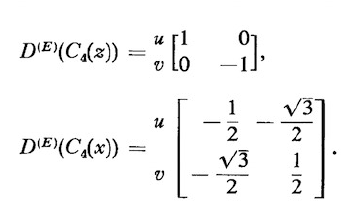

In [9]:
an_irrep = sp.Symbol('E')

In [11]:
for gen, mat in generator_matrices[an_irrep].items():
    display(gen)
    display(mat)

C_{4x}

Matrix([
[      -1/2, -sqrt(3)/2],
[-sqrt(3)/2,        1/2]])

C_{4z}

Matrix([
[1,  0],
[0, -1]])

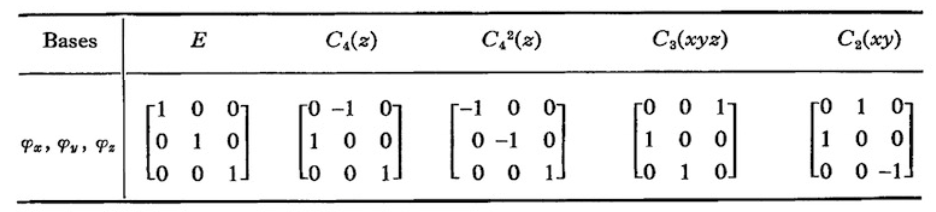

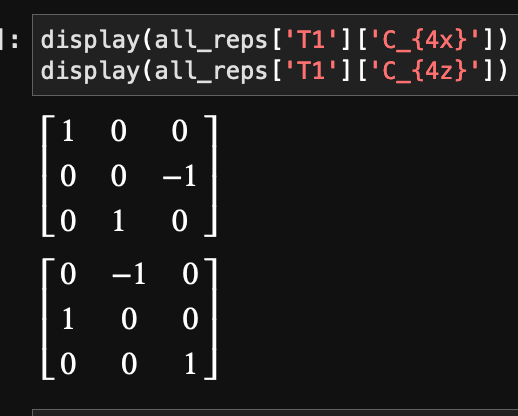

In [65]:
def permute_both(self, swap):
    rp = self.permute(swap,orientation='rows')
    return rp.permute(swap, orientation='cols')
sp.Matrix.permute_both = permute_both

In [68]:
mat = sp.Matrix([[1,2],[3,4]])
# mat.permute_both = permute_both

In [69]:
mat.permute_both([[0,1]])

Matrix([
[4, 3],
[2, 1]])

In [22]:
an_irrep = sp.Symbol('T_1')
display(sp.Matrix(basis_labels[an_irrep]))
for gen, mat in generator_matrices[sp.Symbol('T_1')].items():
    display(gen)
    display(mat)

Matrix([
[α],
[β],
[γ]])

C_{4x}

Matrix([
[ 0, 1, 0],
[-1, 0, 0],
[ 0, 0, 1]])

C_{4z}

Matrix([
[ 0, 0, 1],
[ 0, 1, 0],
[-1, 0, 0]])

In [18]:
# for irrep, mats in group.irrep_matrices.items():
#     if irrep != an_irrep:
#         continue
#     display(irrep)
#     for gop , mat in mats.items():
#         display(gop)
#         display(mat)

In [21]:
an_irrep = sp.Symbol('T_2')
display(sp.Matrix(basis_labels[an_irrep]))
for gen, mat in generator_matrices[an_irrep].items():
    display(gen)
    display(mat)

Matrix([
[ξ],
[η],
[ζ]])

C_{4x}

Matrix([
[ 0,  0, 1],
[ 0, -1, 0],
[-1,  0, 0]])

C_{4z}

Matrix([
[-1,  0, 0],
[ 0,  0, 1],
[ 0, -1, 0]])

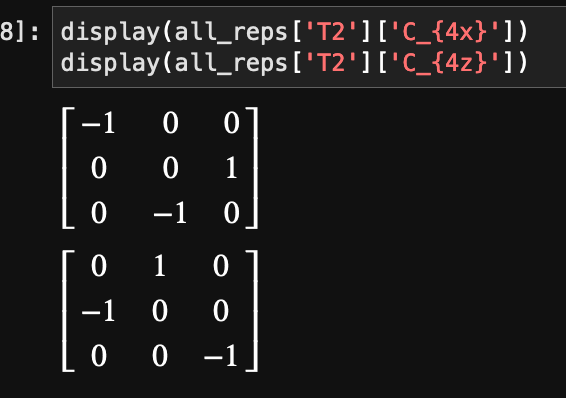

In [162]:
group.multiplication_table

Matrix([
[            {Ee},           C_{2z},           C_{2f},           C_{2e},           C_{2y},           C_{2b},           C_{2d},           C_{2c},           C_{2a},           C_{2x},       C_{3\beta},      C_{3\gamma}, C_{3\gamma}^{-1}, C_{3\alpha}^{-1},  C_{3\beta}^{-1}, C_{3\delta}^{-1},      C_{3\alpha},      C_{3\delta},      C_{4z}^{-1},           C_{4y},      C_{4y}^{-1},           C_{4z},      C_{4x}^{-1},           C_{4x}],
[          C_{2z},             {Ee},           C_{4x},      C_{4x}^{-1},           C_{2x},           C_{2a},      C_{4y}^{-1},           C_{4y},           C_{2b},           C_{2y},      C_{3\delta},      C_{3\alpha}, C_{3\delta}^{-1},  C_{3\beta}^{-1}, C_{3\alpha}^{-1}, C_{3\gamma}^{-1},      C_{3\gamma},       C_{3\beta},           C_{4z},           C_{2c},           C_{2d},      C_{4z}^{-1},           C_{2e},           C_{2f}],
[          C_{2f},      C_{4x}^{-1},             {Ee},           C_{2x},           C_{4x},      C_{3\delta}, C_{3\delta}^{-

In [110]:
mat**(-1)

Matrix([
[0, 0, 1],
[1, 0, 0],
[0, 1, 0]])

IN CONCLUSION: I don't know how sensitive the analys